# SVR

[![Slides](https://img.shields.io/badge/🦌-ReHLine-blueviolet)](https://rehline-python.readthedocs.io/en/latest/)

SVR (Support Vector Regression) solves the following optimization problem:
$$
\min_{\mathbf{\beta} \in \mathbb{R}^d} \sum_{i=1}^{n} (|y_i - \mathbf{x}_i^\intercal \mathbf{\beta}| - \epsilon)_+ + \frac{\lambda}{2} \|\mathbf{\beta}\|^2
$$
where $\mathbf{x}_i \in \mathbb{R}^d$ is a feature vector, and $y_i \in \mathbb{R}$ is a continuous response variable.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [3]:
# Simulate data
np.random.seed(42)
scaler_svr = StandardScaler()

n, d = 10000, 5
X, y = make_regression(n_samples=n, n_features=d, noise=1.0)
X = scaler_svr.fit_transform(X)
X = np.hstack((X, np.ones((n, 1))))  # add intercept
y = y / y.std()

In [4]:
## solve SVR via `plqERM_Ridge`
from rehline import plqERM_Ridge

clf = plqERM_Ridge(loss={'name': 'svr', 'epsilon': 0.1}, C=1.0)
clf.fit(X=X, y=y)

plqERM_Ridge(loss={'epsilon': 0.1, 'name': 'svr'})

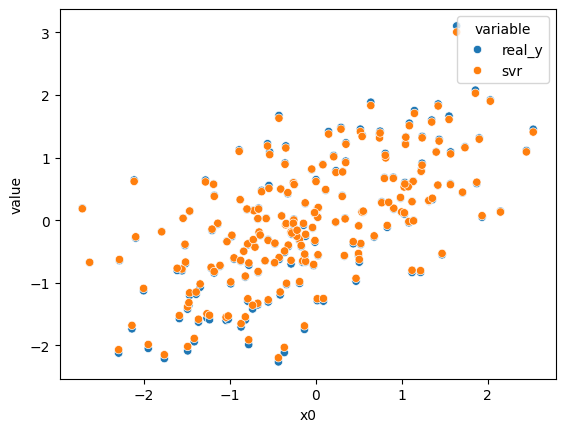

In [5]:
## plot SVR results
warnings.filterwarnings("ignore", "is_categorical_dtype")

n_sample = 200
X_sample, y_sample = X[:n_sample], y[:n_sample]
svr_sample = clf.decision_function(X_sample)

df = pd.DataFrame({'x0': X_sample[:,0], 'real_y': y_sample, 'svr': svr_sample})
df = df.melt(id_vars='x0')

sns.scatterplot(data=df, x='x0', y='value', hue='variable')
plt.show()